# Multiclass Classification with Fully Connected Networks

Version 1.0

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

The purpose of this notebook is to give a practical example (with a dataset taken from the real world) of a multiclass classification problem solved by means of a Feed-Forward Neural Network architecture.

## Notebook Learning Goals

At the end of the notebook you are going to know how to implement yourself a feed-forward neural network architecture in Keras. Moreover, you will have learnt the main differences between the three versions of the gradient descent optimizer (i.e. batch gradient descent, stochastic gradient descent and mini-batch gradient descent). Finally, you are going to know what optimizing a neural network means and how to choose the best network among several possibilities.

## Dataset Overview

**Context**

Fashion-MNIST is a dataset of Zalando's article images (consisting of a training set of 60000 examples and a test set of 10000 examples). Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."
Zalando seeks to replace the original MNIST dataset

**Content**


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed $x$ as $x = 28i + j$, where $i$ and $j$ are integers between 0 and 27. The pixel is located on row $i$ and column $j$ of a 28x28 matrix. 
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top. 

Each row of the dataset is a separate image. Column 1 is the class label. 
Remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

**Labels**

Each training and test example is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

**Acknowledgements**

Original dataset was downloaded from TensorFlow datasets catalog.

**License**

The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Libraries and Dataset Import

This section contains the necessary libraries (such as tensorflow or pandas) you need to import to run the notebook.

In [ ]:
# This command install code from the tensorflow docs repository.
# We need to use tensorflow_docs.modeling function when training our model.
# This function will generate a report on the network's perfomances
# step by step during the training phase (see Training Phase section of the
# notebook). 

# You can safely ignore this cell if you don't understand what it does.

!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-fjjd7bsb
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-fjjd7bsb
     |████████████████████████████████| 1.0MB 9.3MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.00c8dbd4ba403cf3fdd30917f86f817f5228d3812_-cp37-none-any.whl size=147330 sha256=9ed6d253c77ceb2a25a8edbc456968e47b4cb86a76672a39754815396a55e317
  Stored in directory: /tmp/pip-ephem-wheel-cache-g9kwqb78/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from random import *
import time

# tensorflow libraries
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [ ]:
# Referring to the following cell, if you want to re-clone a repository
# inside the google colab instance, you need to delete it first. 
# You can delete the repositories contained in this instance executing 
# the following two lines of code (deleting the # comment symbol).

# !rm -rf ADL-Book-2nd-Ed

In [ ]:
# This command actually clone the repository of the book in the google colab
# instance. In this way this notebook will have access to the modules
# we have written for this book.

# Please note that in case you have already run this cell, and you run it again
# you may get the error message:
#
# fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.
# 
# In this case you can safely ignore the error message.

!git clone https://github.com/toelt-llc/ADL-Book-2nd-Ed.git

Cloning into 'ADL-Book-2nd-Ed'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 1013 (delta 16), reused 50 (delta 3), pack-reused 927
Receiving objects: 100% (1013/1013), 151.66 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [ ]:
# This cell imports some custom written functions that we have created to 
# make the plotting easier. You don't need to undertsand the details and 
# you can simply ignore this cell.
# Simply run it with CMD+Enter (on Mac) or CTRL+Enter (Windows or Ubuntu) to
# import the necessary functions.

import sys
sys.path.append('ADL-Book-2nd-Ed/modules/')

from style_setting import set_style

The following cells are needed to **download** the dataset.

In [ ]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Helper Functions

In [ ]:
def get_label_name(idx):
  """Returns the corresponding label's name, given its numerical value."""
  
  if (idx == 0):
      return '(0) T-shirt/top'
  elif (idx == 1):
      return '(1) Trouser'
  elif (idx == 2):
      return '(2) Pullover'
  elif (idx == 3):
      return '(3) Dress'
  elif (idx == 4):
      return '(4) Coat'
  elif (idx == 5):
      return '(5) Sandal'
  elif (idx == 6):
      return '(6) Shirt'
  elif (idx == 7):
      return '(7) Sneaker'
  elif (idx == 8):
      return '(8) Bag'
  elif (idx == 9):
      return '(9) Ankle boot'

In [ ]:
def get_random_element_with_label (data, lbls, lbl):
  """Returns one numpy array (one column) with an example of a choosen label."""
  
  tmp = lbls == lbl
  subset = data[tmp.flatten(), :]
  return subset[randint(1, subset.shape[1]), :]

Now you have all the necessary elements to successfully implement this tutorial. **Let's have a look at our data**:

In [ ]:
print('Dimensions of the training dataset: ', trainX.shape)
print('Dimensions of the test dataset: ', testX.shape)
print('Dimensions of the training labels: ', trainY.shape)
print('Dimensions of the test labels: ', testY.shape)

Dimensions of the training dataset:  (60000, 28, 28)
Dimensions of the test dataset:  (10000, 28, 28)
Dimensions of the training labels:  (60000,)
Dimensions of the test labels:  (10000,)


## Dataset Preparation

We now one-hot encode the labels and change the images dimensions, to get easy to use data for later. To know more about one-hot encoding process see the [Further Readings](#fr) section or refer to the hands-on chapter 15 of the book.

In [ ]:
labels_train = np.zeros((60000, 10))
labels_train[np.arange(60000), trainY] = 1

data_train = trainX.reshape(60000, 784)

In [ ]:
labels_test = np.zeros((10000, 10))
labels_test[np.arange(10000), testY] = 1

data_test = testX.reshape(10000, 784)

In [ ]:
print('Dimensions of the training dataset: ', data_train.shape)
print('Dimensions of the test dataset: ', data_test.shape)
print('Dimensions of the training labels: ', labels_train.shape)
print('Dimensions of the test labels: ', labels_test.shape)

Dimensions of the training dataset:  (60000, 784)
Dimensions of the test dataset:  (10000, 784)
Dimensions of the training labels:  (60000, 10)
Dimensions of the test labels:  (10000, 10)


## Data Normalization

Let's normalize the training data dividing by 255.0 to get the values between 0 and 1.

In [ ]:
data_train_norm = np.array(data_train/255.0)
data_test_norm = np.array(data_test/255.0)

Let's plot an image as example.

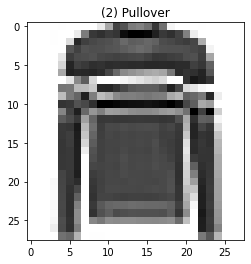

In [ ]:
idx = 5
plt.imshow(data_train_norm[idx, :].reshape(28, 28), cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis("on")
plt.title(get_label_name(trainY[idx]))
plt.show()

Now let's plot one example of each type (label).

In [ ]:
# The following code create a numpy array where in column 0 you will find 
# an example of label 0, in column 1 of label 1 and so on.
labels_overview = np.empty([784, 10])
for i in range (0, 10):
    col = get_random_element_with_label(data_train_norm, trainY, i)
    labels_overview[:,i] = col

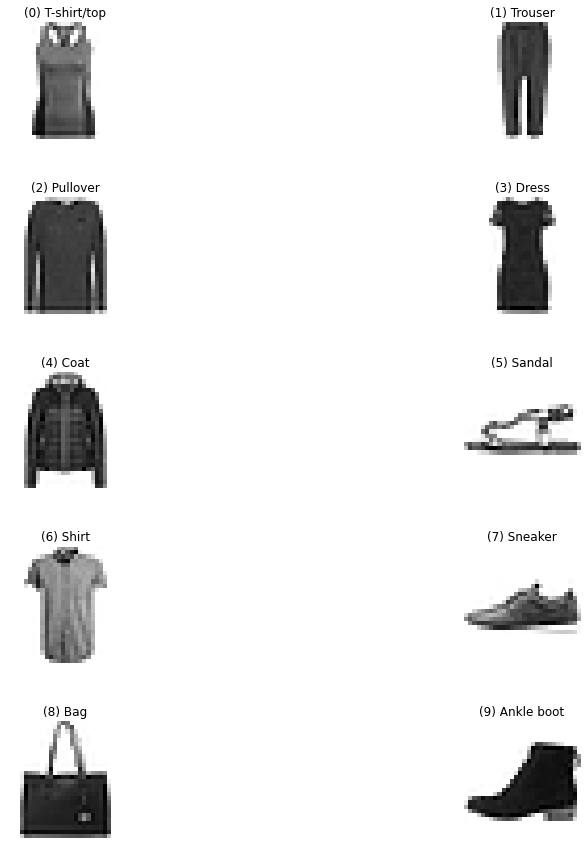

In [ ]:
f = plt.figure(figsize = (15, 15))
count = 1
for i in range(0, 10):
    plt.subplot(5, 2, count)
    count = count + 1
    plt.subplots_adjust(hspace = 0.5)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[:, i].reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

## Feed-forward Network Model with One Hidden Layer 

We will first use a feed-forward network model with one single hidden layer. Our model will be made of an input layer of 784 neurons, an hidden layer of 15 neurons and an output layer of 10 neurons with a softmax function as activation function. Softmax function here is needed since we one-hot encoded the labels. To have more details about this, see the [Further Readings](#fr) section of the notebook or refer to the hands-on chapter of the book about feed-forward neural networks.

In [ ]:
def build_model(opt):
  # create model
	model = keras.Sequential()
	model.add(layers.Dense(15, input_dim = 784, activation = 'relu')) # add first hidden layer and set input dimensions
	model.add(layers.Dense(10, activation = 'softmax')) # add output layer
	# compile model
	model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['categorical_accuracy'])
	return model

In [ ]:
model = build_model(tf.keras.optimizers.SGD(momentum = 0.0, learning_rate = 0.01))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


We now train the model.

In [ ]:
EPOCHS = 1000

history = model.fit(
  data_train_norm, labels_train,
  epochs = EPOCHS, verbose = 0,
  batch_size = data_train_norm.shape[0],
  callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, categorical_accuracy:0.1196,  loss:2.2998,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.3988,  loss:1.7928,  
....................................................................................................
Epoch: 200, categorical_accuracy:0.5263,  loss:1.3827,  
....................................................................................................
Epoch: 300, categorical_accuracy:0.6404,  loss:1.1565,  
....................................................................................................
Epoch: 400, categorical_accuracy:0.6767,  loss:1.0166,  
....................................................................................................
Epoch: 500, categorical_accuracy:0.6975,  loss:0.9267,  
....................................................................................................
Epoch: 600, categorical_accuracy:0.7140,  loss:0.8634

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,categorical_accuracy,epoch
995,0.720737,0.758050,995
996,0.720491,0.758167,996
997,0.720246,0.758367,997
998,0.720001,0.758417,998
999,0.719756,0.758500,999


And we used the trained model on the test dataset.

In [ ]:
test_loss, test_accuracy = model.evaluate(data_test_norm, labels_test, verbose = 0)
print('The accuracy on the test set is equal to: ', int(test_accuracy*100), '%.')

The accuracy on the test set is equal to:  74 %.


Notice that, when training the model, we have set **`batch_size = data_train_norm.shape[0]`** inside Keras `fit` method. The reason for this choice is that we implemented the so-called *batch gradient descent* (i.e. the standard and most simple version of gradient descent). Since Keras set by default the batch size to 32 observations (see Keras `fit` method official documentation for more details, in the [Further Readings](#fr) section of the notebook), while the batch gradient descent updates weights and biases after all training observations have been seen by the network, we needed to change this parameter to obtain the basic version of gradient descent.

In the same way, we needed to set the **`momentum = 0.0`** inside the method `tf.keras.optimizers.SGD`. Therefore, since Keras does not include a function to perform the standard gradient descent, we used the Stochastic Gradient Descent function, setting the momentum to zero and the batch size to the entire number of observations.

We implemented this first feed-forward model to get an idea of what the final performances can be and which are the basic components of feed-forward neural networks in Keras. Now, let's see in more detail which kind of optimizers we can use to obtain the best performances and how they differ from each other.

## Gradient Descent Variations

We will compare three different variations of the gradient descent optimizer to see how much they are efficient.

### Batch Gradient Descent

As we just saw, the batch gradient descent can be defined by the Keras function `tf.keras.optimizers.SGD`, setting the `momentum = 0.0` and the `batch_size = data_train_norm.shape[0]`.

In [ ]:
start = time.time()

In [ ]:
model_bgd = build_model(tf.keras.optimizers.SGD(momentum = 0.0, learning_rate = 0.01))

In [ ]:
EPOCHS = 100

history_bgd = model_bgd.fit(
  data_train_norm, labels_train,
  epochs = EPOCHS, verbose = 0,
  batch_size = data_train_norm.shape[0],
  callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, categorical_accuracy:0.0552,  loss:2.3861,  
....................................................................................................

In [ ]:
print('This took {:.2f} minutes.'.format((time.time() - start)/60))

This took 0.35 minutes.


In [ ]:
hist_bgd = pd.DataFrame(history_bgd.history)
hist_bgd['epoch'] = history_bgd.epoch
hist_bgd.tail()

,loss,categorical_accuracy,epoch
95,1.876968,0.421200,95
96,1.873217,0.423750,96
97,1.869471,0.426417,97
98,1.865731,0.429133,98
99,1.861996,0.431717,99


### Stochastic Gradient Descent

The stochastic gradient descent, as the name suggests, selects a single observation from the dataset with a random probability distribution (which cannot be exactly predicted) and updates weights and biases based on that single observation. Then the process is repeated several times. 

To implement stochastic gradient descent, we need to change the **momentum** parameter, setting it to a value which is **not zero** and we need to set the **mini-batch** size to **1** (in fact, stochastic gradient descent chooses one training sample at a time to update the weights and biases).

In [ ]:
start = time.time()

In [ ]:
model_sgd = build_model(tf.keras.optimizers.SGD(momentum = 0.9, learning_rate = 0.0001))

In [ ]:
EPOCHS = 100

history_sgd = model_sgd.fit(
  data_train_norm, labels_train,
  epochs = EPOCHS, verbose = 0,
  batch_size = 1,
  callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, categorical_accuracy:0.7794,  loss:0.6514,  
....................................................................................................

In [ ]:
print('This took {:.2f} minutes.'.format((time.time() - start)/60))

This took 60.23 minutes.


In [ ]:
hist_sgd = pd.DataFrame(history_sgd.history)
hist_sgd['epoch'] = history_sgd.epoch
hist_sgd.tail()

,loss,categorical_accuracy,epoch
95,0.266158,0.903250,95
96,0.264982,0.904917,96
97,0.264688,0.904633,97
98,0.264469,0.904117,98
99,0.263607,0.905600,99


### Mini-batch Gradient Descent

With this variation of the gradient descent, the dataset is split into a certain number of groups of observations (called batches) and weights are updated only after each batch has been fed to the model. This is by far the method most commonly used in the field of deep learning.

In [ ]:
start = time.time()

In [ ]:
model_mbgd = build_model(tf.keras.optimizers.SGD(momentum = 0.9, learning_rate = 0.01))

In [ ]:
EPOCHS = 100

history_mbgd = model_mbgd.fit(
  data_train_norm, labels_train,
  epochs = EPOCHS, verbose = 0,
  batch_size = 50,
  callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, categorical_accuracy:0.7879,  loss:0.6068,  
....................................................................................................

In [ ]:
print('This took {:.2f} minutes.'.format((time.time() - start)/60))

This took 1.70 minutes.


In [ ]:
hist_mbgd = pd.DataFrame(history_mbgd.history)
hist_mbgd['epoch'] = history_mbgd.epoch
hist_mbgd.tail()

,loss,categorical_accuracy,epoch
95,0.264526,0.902383,95
96,0.264654,0.903250,96
97,0.263360,0.903100,97
98,0.263430,0.903933,98
99,0.263868,0.901950,99


As you can notice from the above results, the **batch gradient descent** is the fastest method in terms of learning phase execution, while the **stochastic gradient descent** is very slow. After 100 epochs, the batch gradient descent reaches an accuracy of only 43% on the training set, while the stochastic gradient descent performs increasingly better (91% accuracy), but it takes around 1 hour to train!!! In the first case the *entire training dataset* is presented to the net before the actual weights and biases update takes place, while in the second case *a single observation* is randomly picked up to perform update.

The **mini-batch gradient descent**, on the contrary, is slightly slower than the batch gradient descent, but after only 100 epochs achieves an accuracy of 90% on the training dataset. In this case, groups of 50 training set observations are presented to the net before the actual weights and biases update takes place. Therefore, updates are more frequent with respect to the traditional gradient descent, leading to an overall increasing performance.

The mini-batch gradient descent is definitely the best compromise in terms of execution time and classification performance. In fact, it is currently the preferred method to be used as optimizer in deep neural networks, among the different gradient descent types, since it can reach high performances, maintaining a good trade-off between performance and execution time.

#### Comparison of Mini-batch Sizes

We now define a function to easily try different mini-batch sizes and compare the relative performances.

In [ ]:
def mini_batch_gradient_descent(mb_size):
  # build model
  model_mbgd = build_model(tf.keras.optimizers.SGD(momentum = 0.9, learning_rate = 0.0001))
  # set number of epochs
  EPOCHS = 100
  # train model
  history_mbgd = model_mbgd.fit(
    data_train_norm, labels_train,
    epochs = EPOCHS, verbose = 0,
    batch_size = mb_size,
    callbacks = [tfdocs.modeling.EpochDots()])
  # save performances
  hist_mbgd = pd.DataFrame(history_mbgd.history)
  hist_mbgd['epoch'] = history_mbgd.epoch  
  return hist_mbgd

We also save the execution time associated to each mini-batch size.

In [ ]:
start = time.time()
res_5 = mini_batch_gradient_descent(5)
time_5 = (time.time() - start)/60

start = time.time()
res_20 = mini_batch_gradient_descent(20)
time_20 = (time.time() - start)/60

start = time.time()
res_50 = mini_batch_gradient_descent(50)
time_50 = (time.time() - start)/60

start = time.time()
res_100 = mini_batch_gradient_descent(100)
time_100 = (time.time() - start)/60

start = time.time()
res_200 = mini_batch_gradient_descent(200)
time_200 = (time.time() - start)/60

start = time.time()
res_300 = mini_batch_gradient_descent(300)
time_300 = (time.time() - start)/60


Epoch: 0, categorical_accuracy:0.6618,  loss:1.0341,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.4857,  loss:1.6622,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.3795,  loss:1.9353,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.2293,  loss:2.1291,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.0830,  loss:2.2095,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.2086,  loss:2.1759,  
....................................................................................................

Have a look at the results. We compared the performance and the execution time of 6 different mini-batch sizes:
- 5
- 20
- 50
- 100
- 200
- 300

In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

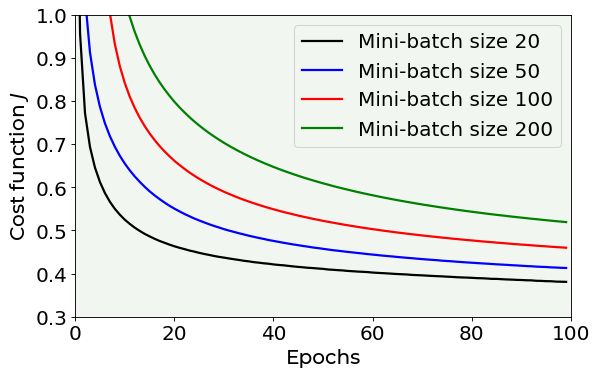

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(res_20['epoch'], res_20['loss'], color = 'black', label = 'Mini-batch size 20')
ax.plot(res_50['epoch'], res_50['loss'], color = 'blue', label = 'Mini-batch size 50')
ax.plot(res_100['epoch'], res_100['loss'], color = 'red', label = 'Mini-batch size 100')
ax.plot(res_200['epoch'], res_200['loss'], color = 'green', label = 'Mini-batch size 200')

plt.ylabel('Cost function $J$', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('Epochs', fontproperties = fm.FontProperties(fname = f))
plt.legend(loc = 'best')

plt.ylim(0.3, 1.0)
plt.xlim(0, 100)

plt.axis(True)
plt.show()

The above plot, which reports the decreasing cost function against the number of epochs for 4 of the 6 sizes that have been tested, shows that the smaller the mini-batch size, the lower the cost function. Before discussing about which can be the best solution, let's have a look at the time required to training the network for different mini-batch sizes.

#### Time Needed by Different Batch Sizes

In [ ]:
time_mb = [time_5, time_20, time_50, time_100, time_200, time_300]
cost_funct_100 = [res_5['loss'].values[-1], res_20['loss'].values[-1], res_50['loss'].values[-1],
                  res_100['loss'].values[-1], res_200['loss'].values[-1], res_300['loss'].values[-1]]
label_mb = [5, 20, 50, 100, 200, 300]

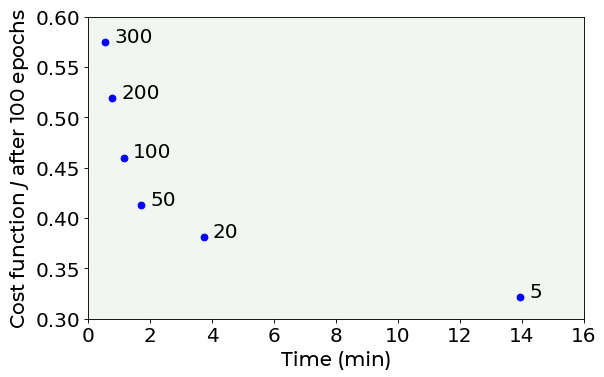

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(time_mb, cost_funct_100,  color = 'blue')

plt.ylabel('Cost function $J$ after 100 epochs', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('Time (min)', fontproperties = fm.FontProperties(fname = f))

for i, txt in enumerate(label_mb):
  ax.annotate(txt, (time_mb[i] + 0.3, cost_funct_100[i]))

plt.ylim(0.30, 0.60)
plt.xlim(0, 16)

plt.axis(True)
plt.show()

As you can see, to choose which is the best value for the mini-batch size, we must always consider the trade-off between performance and execution time. In fact, with a very little mini-batch size (5) we obtain a very low cost function, but with a high execution time (around 14 minutes). Let's know recap what we have just seen.

##### Final Tips

So, how can we choose the size of mini-batches? 

- As a general rule of thumb, small numbers (such as 30 of 50) are a good option.
- In general, the lower the mini-batch size, the lower is the value achieved by the cost function.
- However, you must always consider both running time and convergence speed (with respect to number of epochs).

For example, as you can see in the last figure, after 100 epochs, a mini-batch size of 5 reaches a very low cost function value, but the running time is increasingly higher than a mini-batch size of 20. In this specific case, 20 is a better choice, since it takes into account both the performance and the running time.

## Examples of Wrong Predictions

It is instructive to inspect where the network got wrong results.

In [ ]:
pred_prob_test = model.predict(data_test_norm) # predictions
pred_test = np.argmax(pred_prob_test, 1) # keep the highest probability returned by the softmax function

In [ ]:
corr_pred = pred_test == testY

The `corr_pred` array contains True when the prediction on the test set is right and False when it is not.

In [ ]:
corr_pred[:50]

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False, False,  True, False, False])

Let's plot one example of wrong prediction.

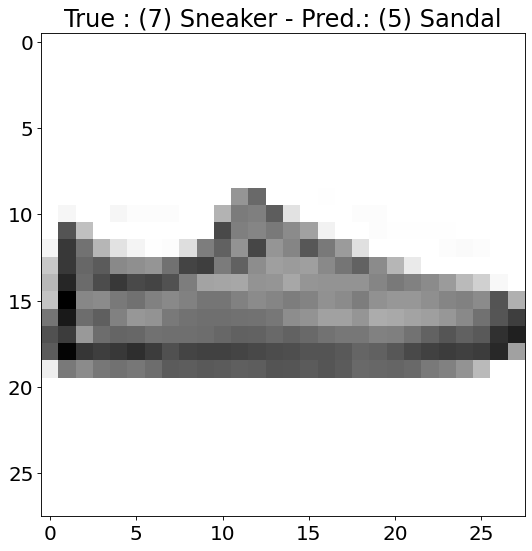

In [ ]:
f = plt.figure(figsize = (8, 8));
plt.imshow(data_test_norm[12, :].reshape(28, 28), cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.title('True : ' + get_label_name(testY[12]) + ' - Pred.: '+str(get_label_name(pred_test[12])))
plt.axis('on')
plt.show()

Let's get 10 random examples of wrongly classified images.

In [ ]:
lim = 70
wrongly_classified_images = data_test_norm[0:lim, :]
wrongly_classified_images = wrongly_classified_images[corr_pred[0:lim] == False, :]
wrong_labels = testY[0:lim]
wrong_labels = wrong_labels[corr_pred[0:lim] == False]
wrong_pred = pred_test[0:lim]
wrong_pred = wrong_pred[corr_pred[0:lim] == False]

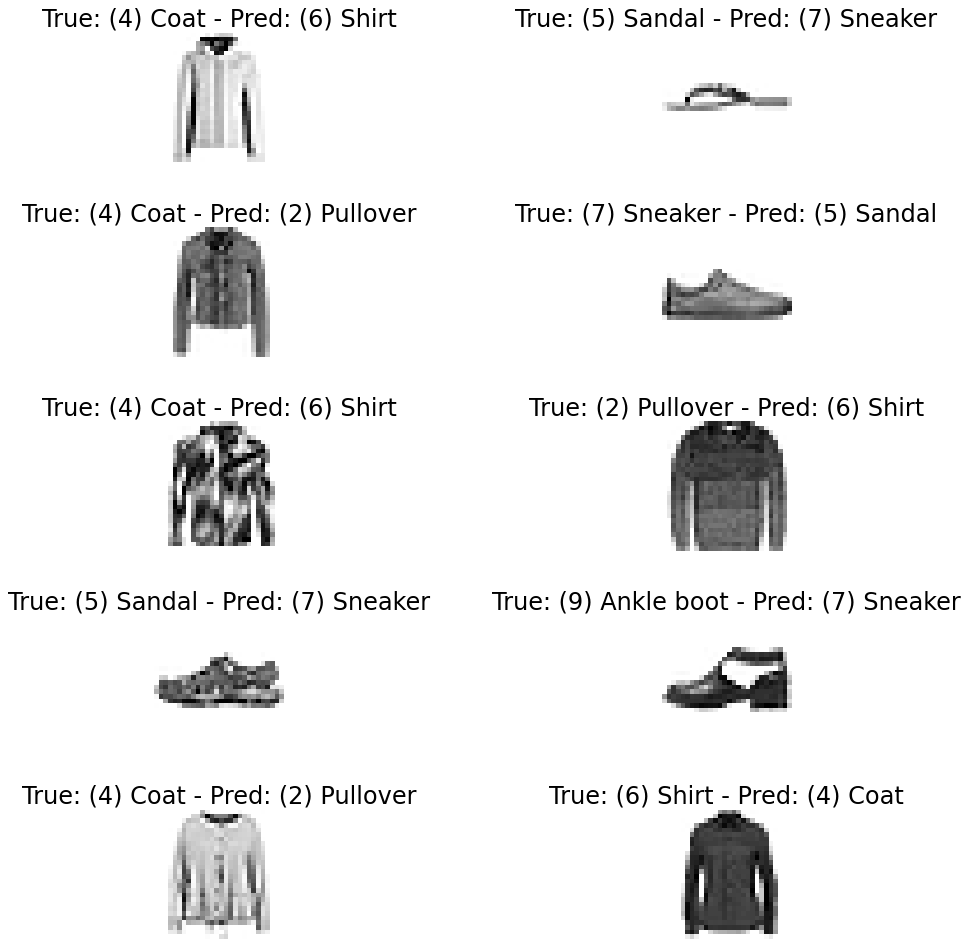

In [ ]:
f = plt.figure(figsize = (15, 15))

count = 1 
for i in range(0, 10):
    plt.subplot(5, 2, count)
    count = count + 1
    plt.subplots_adjust(hspace = 0.5)
    plt.title('True: ' + get_label_name(wrong_labels[i]) + ' - Pred: ' + get_label_name(wrong_pred[i]))
    some_digit_image = wrongly_classified_images[i,:].reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
    plt.axis('off')
    pass

The question to ask yourself is: would I have done the same errors made by the network? For example, in the case reported left top, the answer is yes: it is difficult to say if that image is a coat or a shirt. So, the error may be acceptable.

## Adding Many Layers Efficiently

Until know we have changed the optimizer, but always working with the same architecture made of one single hidden layer. Let's try adding several layers and several numbers of neurons per layer.

We first write a function to easily change and test different number of layers and neurons per layer of our model.

In [ ]:
def model_nlayers(num_neurons, num_layers):
    # build model
    inputs = keras.Input(shape = 784) # input layer
    # first hidden layer
    dense = layers.Dense(num_neurons, activation = 'relu')(inputs)
    # customized number of layers and neurons per layer
    for i in range(num_layers - 1):       
        dense = layers.Dense(num_neurons, activation = 'relu')(dense)
    # output layer   
    outputs = layers.Dense(10, activation = 'softmax')(dense)
    model = keras.Model(inputs = inputs, outputs = outputs, name = 'model')
    # set optimizer and loss
    opt = tf.keras.optimizers.SGD(momentum = 0.9, learning_rate = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['categorical_accuracy'])
    
    # train model
    history = model.fit(
      data_train_norm, labels_train,
      epochs = 200, verbose = 0,
      batch_size = 50,
      callbacks = [tfdocs.modeling.EpochDots()])
    # save performances
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch 

    return hist, model

In [ ]:
res_10_1, model_10_1 = model_nlayers(10, 1)
res_10_2, model_10_2 = model_nlayers(10, 2)
res_10_3, model_10_3 = model_nlayers(10, 3)
res_10_4, model_10_4 = model_nlayers(10, 4)
res_100_4, model_100_4 = model_nlayers(100, 4)


Epoch: 0, categorical_accuracy:0.2895,  loss:1.9510,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8501,  loss:0.4346,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.2192,  loss:2.1002,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8481,  loss:0.4347,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.1972,  loss:2.2526,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8120,  loss:0.5151,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.1023,  loss:2.2771,  
..

In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

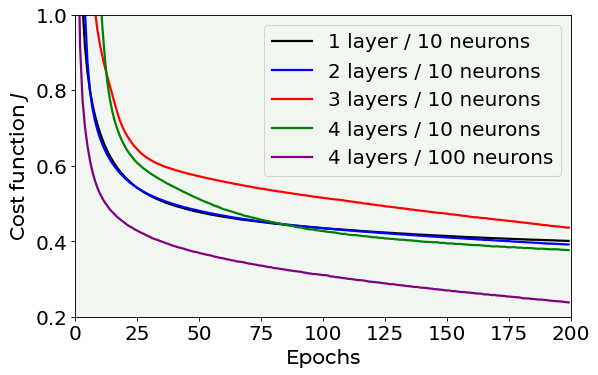

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(res_10_1['epoch'], res_10_1['loss'], color = 'black', label = '1 layer / 10 neurons')
ax.plot(res_10_2['epoch'], res_10_2['loss'], color = 'blue', label = '2 layers / 10 neurons')
ax.plot(res_10_3['epoch'], res_10_3['loss'], color = 'red', label = '3 layers / 10 neurons')
ax.plot(res_10_4['epoch'], res_10_4['loss'], color = 'green', label = '4 layers / 10 neurons')
ax.plot(res_100_4['epoch'], res_100_4['loss'], color = 'purple', label = '4 layers / 100 neurons')

plt.ylabel('Cost function $J$', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('Epochs', fontproperties = fm.FontProperties(fname = f))
plt.legend(loc = 'best')

plt.ylim(0.2, 1.0)
plt.xlim(0, 200)

plt.axis(True)
plt.show()

In the above plot you can see the results of testing 5 different combinations of neurons and layers:
- 1 layer and 10 neurons
- 2 layers and 10 neurons
- 3 layers and 10 neurons
- 4 layers and 10 neurons
- 4 layers and 100 neurons

You can be forced to think that the last model is the best, but you first have to check overfitting (never forget overfitting). In fact, when the model is too complex, it can be too precise on the training dataset and not general on other datasets. Let's check it together.

In [ ]:
train_loss, train_accuracy = model_100_4.evaluate(data_train_norm, labels_train, verbose = 0)
print('The accuracy on the train set is equal to: ', int(train_accuracy*100), '%.')

The accuracy on the train set is equal to:  91 %.


In [ ]:
test_loss, test_accuracy = model_100_4.evaluate(data_test_norm, labels_test, verbose = 0)
print('The accuracy on the test set is equal to: ', int(test_accuracy*100), '%.')

The accuracy on the test set is equal to:  87 %.


And in fact, as you can see from the performance of the last model in terms of accuracy on the training and test set, it is starting to go in overfitting regime.

## Comparing Different Networks

We now study how adding more  neurons in a network with one hidden layer changes the training phase of the network itself.

In [ ]:
res_1_1 = model_nlayers(1, 1)
res_5_1 = model_nlayers(5, 1)
res_15_1 = model_nlayers(15, 1)
res_30_1 = model_nlayers(30, 1)


Epoch: 0, categorical_accuracy:0.1463,  loss:2.2445,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.3083,  loss:1.7661,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.1853,  loss:2.1649,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8246,  loss:0.5089,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.3774,  loss:1.8675,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8557,  loss:0.4202,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.3945,  loss:1.8782,  
..

In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

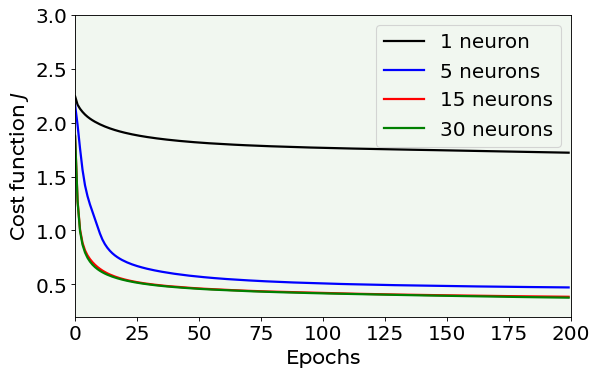

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(res_1_1['epoch'], res_1_1['loss'], color = 'black', label = '1 neuron')
ax.plot(res_5_1['epoch'], res_5_1['loss'], color = 'blue', label = '5 neurons')
ax.plot(res_15_1['epoch'], res_15_1['loss'], color = 'red', label = '15 neurons')
ax.plot(res_30_1['epoch'], res_30_1['loss'], color = 'green', label = '30 neurons')

plt.ylabel('Cost function $J$', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('Epochs', fontproperties = fm.FontProperties(fname = f))
plt.legend(loc = 'best')

plt.ylim(0.2, 3.0)
plt.xlim(0, 200)

plt.axis(True)
plt.show()

As you can see from the above plot, one single neuron is too simple (and underfits the dataset), while at a certain point, adding so many neurons does not change the performance.

### Final Tips

The best way to get experience with feed-forward neural networks is to play with the models. As you can imagine, there is no one solution that fits all the cases and there is no specific rule. In each case you have to try different architectures (varying number of layers and number of neurons), parameters (learning rate), optimizers, .... Then you check the performance of your models on the training and test datasets to see which is the one that gives best values (without overfitting) and you inspect the plot of loss function vs number of epochs to understand if the model was well trained.

General useful advice can be:
- Always start with the less complex models (e.g. small number of neurons and layers) and move to more complex ones.
- In case you cannot achieve good accuracy, check if any of your layers has a particularly low number of neurons. This may have killed the effective capacity of learning. Remember when we tried a model with just one neuron.
- Remember that a low or high number of neurons is always relative to the number of features you have (the more the features the more the complexity of learning).

## Exercises

1. [*Easy Difficulty*] Try to build a multiclass classification model like the one we saw together in this notebook, but with a different dataset, the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/). To download the dataset from TensorFlow use the following lines of code:
```
from tensorflow import keras 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
```
2. [*Medium Difficulty*] Try to apply He weights initialization (https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal) in the multiclass classification problem we saw in the notebook and see if you can speed up the learning phase. 
3. [*Hard Difficulty*] Try to optimize the feed-forward neural network built in this notebook to reach the best possible accuracy (without overfitting the training dataset!). Tune the number of epochs, the learning rate, the optimizer, the number of neurons, layers and mini-batches. Hint: write a function like the one we used to test different numbers of layers and neurons and give it as inputs all the tunable parameters. 
4. [*Hard Difficulty*] Consider the regression problem we solved with a model made by one single neuron in the notebook linked to Chapter 14 (predicting radon activity in U.S. houses). Try to build a feed-forward neural network to solve the same regression task. See if you can get better prediction performances. Hint: you will need to change the loss function and the metrics to evaluate your results, and one-hot encoding will not be necessary anymore. 

## Further Readings <a name = "fr"></a>

**Fashion-MNIST dataset**

1. Xiao, Han, Kashif Rasul, and Roland Vollgraf. "Fashion-mnist: a novel image dataset for benchmarking machine learning algorithms." arXiv preprint arXiv:1708.07747 (2017)

**One-hot encoding, integer encoding, softmax function**

1. https://deepai.org/machine-learning-glossary-and-terms/one-hot-encoding (what one-hot encoding means)
2. https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78 (why we need to use softmax function and the difference between one-hot encoding and integer encoding)

**Keras fit method**
1. https://keras.io/api/models/model_training_apis/#fit-method (official documentation)

